# Master Notebook

This notebook is the homepage (for the analysis section at least) and should direct you to where you need to go, and guide you through the whole process.

Some of the tasks and steps are pretty intensive, and would make this into the world's longest notebook if we did them here, so there are some sub-notebooks you will be directed to.

There are also a number of custom modules included that we use via import statements. These contain code that I felt overcomplicated the otherwise logical and easy to follow process, so I hid it in these modules. You're welcome to take a look if you are curious and confident, or you can of course just let them do their thing.

### Initialization

Because of the unofficial nature of these modules, we need to tell python where to find them. In this first cell you'll want to replace the path with the path to get to the folder containg your QAOP scripts. 

You're also welcome to put your data files in a seperate location from these notebooks and the code. If you choose to do this, you should specify that location in the cell below.

Run the following cells before continuing; the cells should make sure that everything is prepped and ready.

In [3]:
import sys
#My QAOP folder is in: /Users/aidanmcclung/Desktop/Summer_Exoplanets

codeFilePath = '/Users/aidanmcclung/Desktop/Summer_Exoplanets/'  #/QAOP/ <- folder containing QAOP folder.
sys.path.append(codeFilePath) #this lets python know to look here for import statements

We'll need to copy and paste that ^ cell into every new notebook we use, so be ready for that! :)

In [4]:
#We want to save our paths to a file so that our code modules can use it as well!
#In future notebooks we just use a method in the QAOP_Utils module to look up the file.

#This is where you should change the folder you have your data in if you need to
dataFilePath = '/Users/aidanmcclung/Desktop/Summer_Exoplanets/Demo/'
#dataFilePath = ''

import io

with open(codeFilePath+'QAOP/config.txt','w') as config_file:
    config_file.write(f"codeFilePath='{codeFilePath}'")
    config_file.write("\n")
    config_file.write(f"dataFilePath='{dataFilePath}'")

In [ ]:
#verify that worked by trying to read it and printing the results
with open(codeFilePath+'QAOP/config.txt','r') as config_file:
    testcodeFilePath = config_file.readline()
    testdataFilePath = config_file.readline()
    print(testcodeFilePath)
    print(testdataFilePath)
#modules in the QAOP package should now try and look for this config file automatically.

    It was brought to my attention during the review process that it was quite confusing that `codeFilePath` was written to the data file, and that in every notebook we paste that string, and then read in the config file. Indeed, writing the path to the config file is **entirely pointless**. We need the path in order to get to the config file, so the codeFilePath in there does not ever get used

Throughout the subsequent notebooks there are a few folders that things will try to call and access. These should be in the dataFilePath you specified, and the following cell will make them if they don't exist

In [ ]:
#we need to check and maybe create all the folders we will want to use:
import os
required_directories = ['input','output','myWorking','photometry']

for rq_dir in required_directories:
    if not os.listdir(dataFilePath).count(rq_dir): 
        print(rq_dir,": directory does not exist, creating one")
        os.mkdir(dataFilePath+rq_dir)

# Steps

## Getting The Data

The first thing we have to do is actually get our data. Navigate to data.itelescope.net, and log in. Next find the images for your observation, then download and unzip them. 

From there, we should open up one of the images in DS9 (See OnQ if unsure whet that program is) and check what we have for a peak value on the target.

For this example, I used image 6, and had a peak of 37k.

Next we need to rename the images, which would be a bit tedious to do manually.

## Renaming Script
With this script we get all of the descriptive file names renamed into '###.fit' in a folder called 'input', which is what we'll need for our next script. There was/is a seperate notebook for this, but it is very simple so I added a few cells to do the same thing here.

When you do this, you'll need to replace the `downloaded_images_path` with the path that will be relevant for you. There are 4 commented lines demonstrating how I navigated from my root project folder to where the images are, and we then move them by 'renaming' them. You can follow a similar process. As well, if you created a seperate area for your data to go, you may need to start off the path with a `dataFilePath+` as shown in the final line

If you leave the prefix blank, like I had, you should have unzipped your downloads from iTelescope into the same folder where this notebook is running from. **Otherwise, add a `dataFilePath` like in the bottom line**.

If you need to navigate back/up a directory, you can do so by adding `'../'` to the relevant location in your (relative) path.

In [ ]:
import os

In [ ]:
#print(os.listdir())
#print(os.listdir('T21'))
#print(os.listdir('T21/TrES-2'))
#print(os.listdir('T21/TrES-2/20230807'))
downloaded_images_path = 'T21/TrES-2/20230807/'
#downloaded_images_path = dataFilePath + 'T21/TrES-2/20230807/'

After identifying where our images are, we rename them with the following simple loop:

In [ ]:

# !!!! YOU NEED TO HAVE REPLACED DOWNLOADED_IMAGES_PATH with the path to your images!!!!

for filename in os.listdir(downloaded_images_path):
    #either of the two following lines are intended to filter out and skip anything thats not an iTelescope image
    if not filename[-4:] == '.fit': continue
    #if not filename[10:] == 'calibrated': continue
    
    #The last seven digits of our images will be ###.fit, so that's what we keep
    os.rename(downloaded_images_path+filename,dataFilePath+"input/"+filename[-7:])

## AstrometryNotebook

For the next major step, you'll need to open up a suplementary notebook: "AstrometryNotebook". You'll also want to make sure you have the "client.py" module installed somewhere. It should be included in the QAOP modules folder, but the subnotebook will have a new python kernal and not know to look there, so you'll have to copy the same path defining cell we had at the start of this notebook.

The Astrometry notebook is quite well detailed! Basically we're adding all of our images to nova.astrometry.net to get wcs data. The basic summary of the process is that the notebook will take every image in the 'input' folder, and then upload them to the site. It will then loop through the list it created of all the files it uploaded, and download the new versions. These just appear in the same directory the script is in, so the last thing it does is move them into the folder 'output'.

*For those that are curious, there are a few cells at the end of the Astrometry notebook that compares and shows what changed when we did this process.*

## StarIDNotebook
The next step of our analysis is to identify the stars, and give them names that we will use in our analysis.

We don't particularly care or need to know their actual names at this point in our analysis, so I generally name them all like 'sA,sB,...'. 

The one difference is that we need to identify which one is the target, so I will often add another identifier. The point of all of this is to have a list of RA and DEC for stars that we will use in our future analysis.

All of this will be done using the "StarIDNotebook" at the moment, although a QAOP module is in the works to do this functionality. For now though, open up the suplementary notebook, and follow it's steps to create the `nameloc.csv` file.

*It is pretty badly documented at the moment, but I am going to prioritize finishing the documentation of all the things and steps in the process before I really go back and explain that whole mess... It is, of all the suplementary notebooks, the last reamining corpse of my original mega notebook, which means it has a lot of confusing extra things and hurts my brain to look at...*

## Radial Profiling Notebook

After we have given names to each of our stars, the final step in preparing for photometry is to know how big of an aperture to use. We'll do this using a relative scale based on the Full Width Half Max of the stars in our images, which we will find with this notebook.

After going through this notebook, you should have created an `apertures.csv` file

*I totally forgot about detailing this notebook as I was writing and explaining in the master, and I had thought I was done and ready to upload some to github, but then realized I forgot it. This was a mental blow, and I shall leave properly explaining for the first update and continue uploading to github*

## Photometry Notebook

The next step is perhaps my favourite, and also the most helpful to really unpack and do manually.

The `lightCounting` notebook goes through the process from the ground up, and you should first go there and follow along with the steps to learn about whats going on.

The steps and functions that I go over in that notebook are packaged in the `QAOP_photometry` module, and a description of that module can also be found in the supplementary notebook.


**AFTER YOU HAVE GONE THROUGH THE NOTEBOOK**, the steps can be automatically completed by looping through and running for each of your images. If you ran the loops in the other notebook, you can skip the following code cells and continue on to the Differential Photometry section. Otherwise, run them before you do.

In [ ]:
import QAOP.QAOP_photometry as QPhot
import numpy as np
#import os #We should have os from above.
from astropy.table import Table

In [ ]:
#photinstance = QPhot.photInstance(apertureFilePath=dataFilePath+'apertures.csv',resultDir=dataFilePath+'photometry',disableConfig=True)
photinstance = QPhot.photInstance() #It should read in the parameters automatically, if not, use the line above instead
#if you want to restart, you'll need to undo a "autosave" that it does with the following line:
photinstance.clearMasterBuffer()

There are two ways we could loop through our files; We can either look in the folder and run for each file thats in there or we can count up to the highest number and look for a file matching each of those numbers.

In [ ]:
#This first version runs for all of the files in the output folder, but the times will end up out of order because of how
# You could instead run for a number range, like in the second option.

#Now, we need to run this photometry. We can do that by calling the runForFile method with a file path
#for fn in os.listdir(dataFilePath+'output'):
#    if not fn[:-5] == '.fits' : continue #Filter non fits images that may be hididng
#    filepath = dataFilePath+'output/'+fn
#    photinstance.runForFile(filepath) #def runForFile(self,filepath):

In [ ]:
#Now, we need to run this photometry. We can do that by calling the runForFile method with a file path,
#we can get that file path using a number with a helpful little function in the utils module
from QAOP.QAOP_utils import getFilepath
#  This method should automatically use the 'dataFilePath' that we wrote to the config file earlier

#This version counts up numbers; but you'll need to skip any that would cause problems
highest_image_number = 73

for imgnumber in range(1,highest_image_number+1):
    
    #if imgnumber == {badnumber}: continue #Skip any numbers that we need to (ex, file corrupted etc)
    
    filepath = getFilepath(imgnumber) #adds dataFilePath already
    #print(filepath) # For Troubleshooting
    photinstance.runForFile(filepath) #function is: runForFile(self,filepath)

In [ ]:
#After we have run for all of our files
photinstance.exportMasterAsSimple() #this should go to dataFilePath
#print(photinstance.resultDir) # if you're having trouble finding the file, this is where it is

## Differential Photometry

For the next part, it is fairly simple to do, and you can choose to do it in a few different ways depending on what you'd like.

What we got from the photometry section was the **apparent flux** in some arbitrary units. The apparent flux depends on a bunch of factors, and doesn't tell us very much on it's own. In order to properly analyze things, we need to somehow get to a standard reference frame.

Generally when discussing quanties of light from stars, we use Magnitudes. You can convert a flux directly to a magnitude on it's own with $ m = -2.5 log_{10} (F) $, but this number has no more meaning than the arbitrary flux does.

We could identify some standard reference catalogue stars in our images, and use their fluxes to compute the Absolute Magnitudes for all our stars in some reference band. 

However, we can get around this because of what we're doing. Unlike an observer who is cataloguing stars and their brightness to reference and use later, we are interested in how the brightness changes with time. 

Every star in our image is affected by the same atmospheric affects, so if we look only at the comparison between how bright two stars are, specifically how one varies when the other's variation has been removed, we should see meaningful results.

We can do this either by taking the Relative Flux (ratio of the fluxes) or with the Magnitude Difference:

$$ M_a - M_b = -2.5 log_{10} \left(  \frac{F_a}{F_b} \right) $$

This comparison can either be done in advance, and saved to a table or file, or you can read in solely the fluxes you are interested in and compute things as you use them.

It is recommended that you do the former, because it makes it a lot more efficient to modify plots or do further analysis on the data without having to recompute each of the data points.

In [ ]:
#Here we should do the differential comparison step

#You'll need to define a function to compute whatever difference you use, and may do so however you wish
# Your end result may look something like the following:

def sample_difference(flux1,flux2):
    return "differential comparison"

differential_table = "new table"
for reference_source in photometry_table:
    differential_table.add_data( sample_difference( photometry_table['target'].data, reference_source.data) )
    
differential_table.write('diff_phot.ecsv',overwrite=True)

There is no requirement to, but you may be interested in normalizing your data, so that different stars can be compared directly. Since the scale is already arbitrarily measuring only a difference, we can shift that scale however we would like. You could shift your data in a number of ways; so that the lowest point becomes some fixed value, or the highest, or the average over the whole data set. 

The most common way to normalize data in literature is such that the maximum (brightest) point is one, and then the other points are all between 0 and 1, expressing a fraction of the maximum brightness. This is because, logically, the star should be some bright constant value, and then have its brightness dip by some fraction during the transit.

## Plotting

#### !! Each plot should have meaningful (and correct) axis labels and titles, and legends where applicable !!

We can now make the light curve we've been working towards this whole time.

Recall that a light curve is a plot showing the brightness as a function of time; with our differential photometry done, we now have a meaningful value for the 'brightness' of the target. 

The main required plot that you MUST make is one showing the brightness of the target star as a function of time. This should use one reference star, but which star is undecided (choose the one that makes your transit look best!).

*The times in the 'time' column of your table may still be the date time strings from the fits header. If they are, you can get the numeric (decimal) hours with the following utils method:*

In [60]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np

sample_table = Table.read(codeFilePath+'QAOP/SampleData/simple.ecsv')

from QAOP.QAOP_utils import genTimesFromTable
times = genTimesFromTable( sample_table )

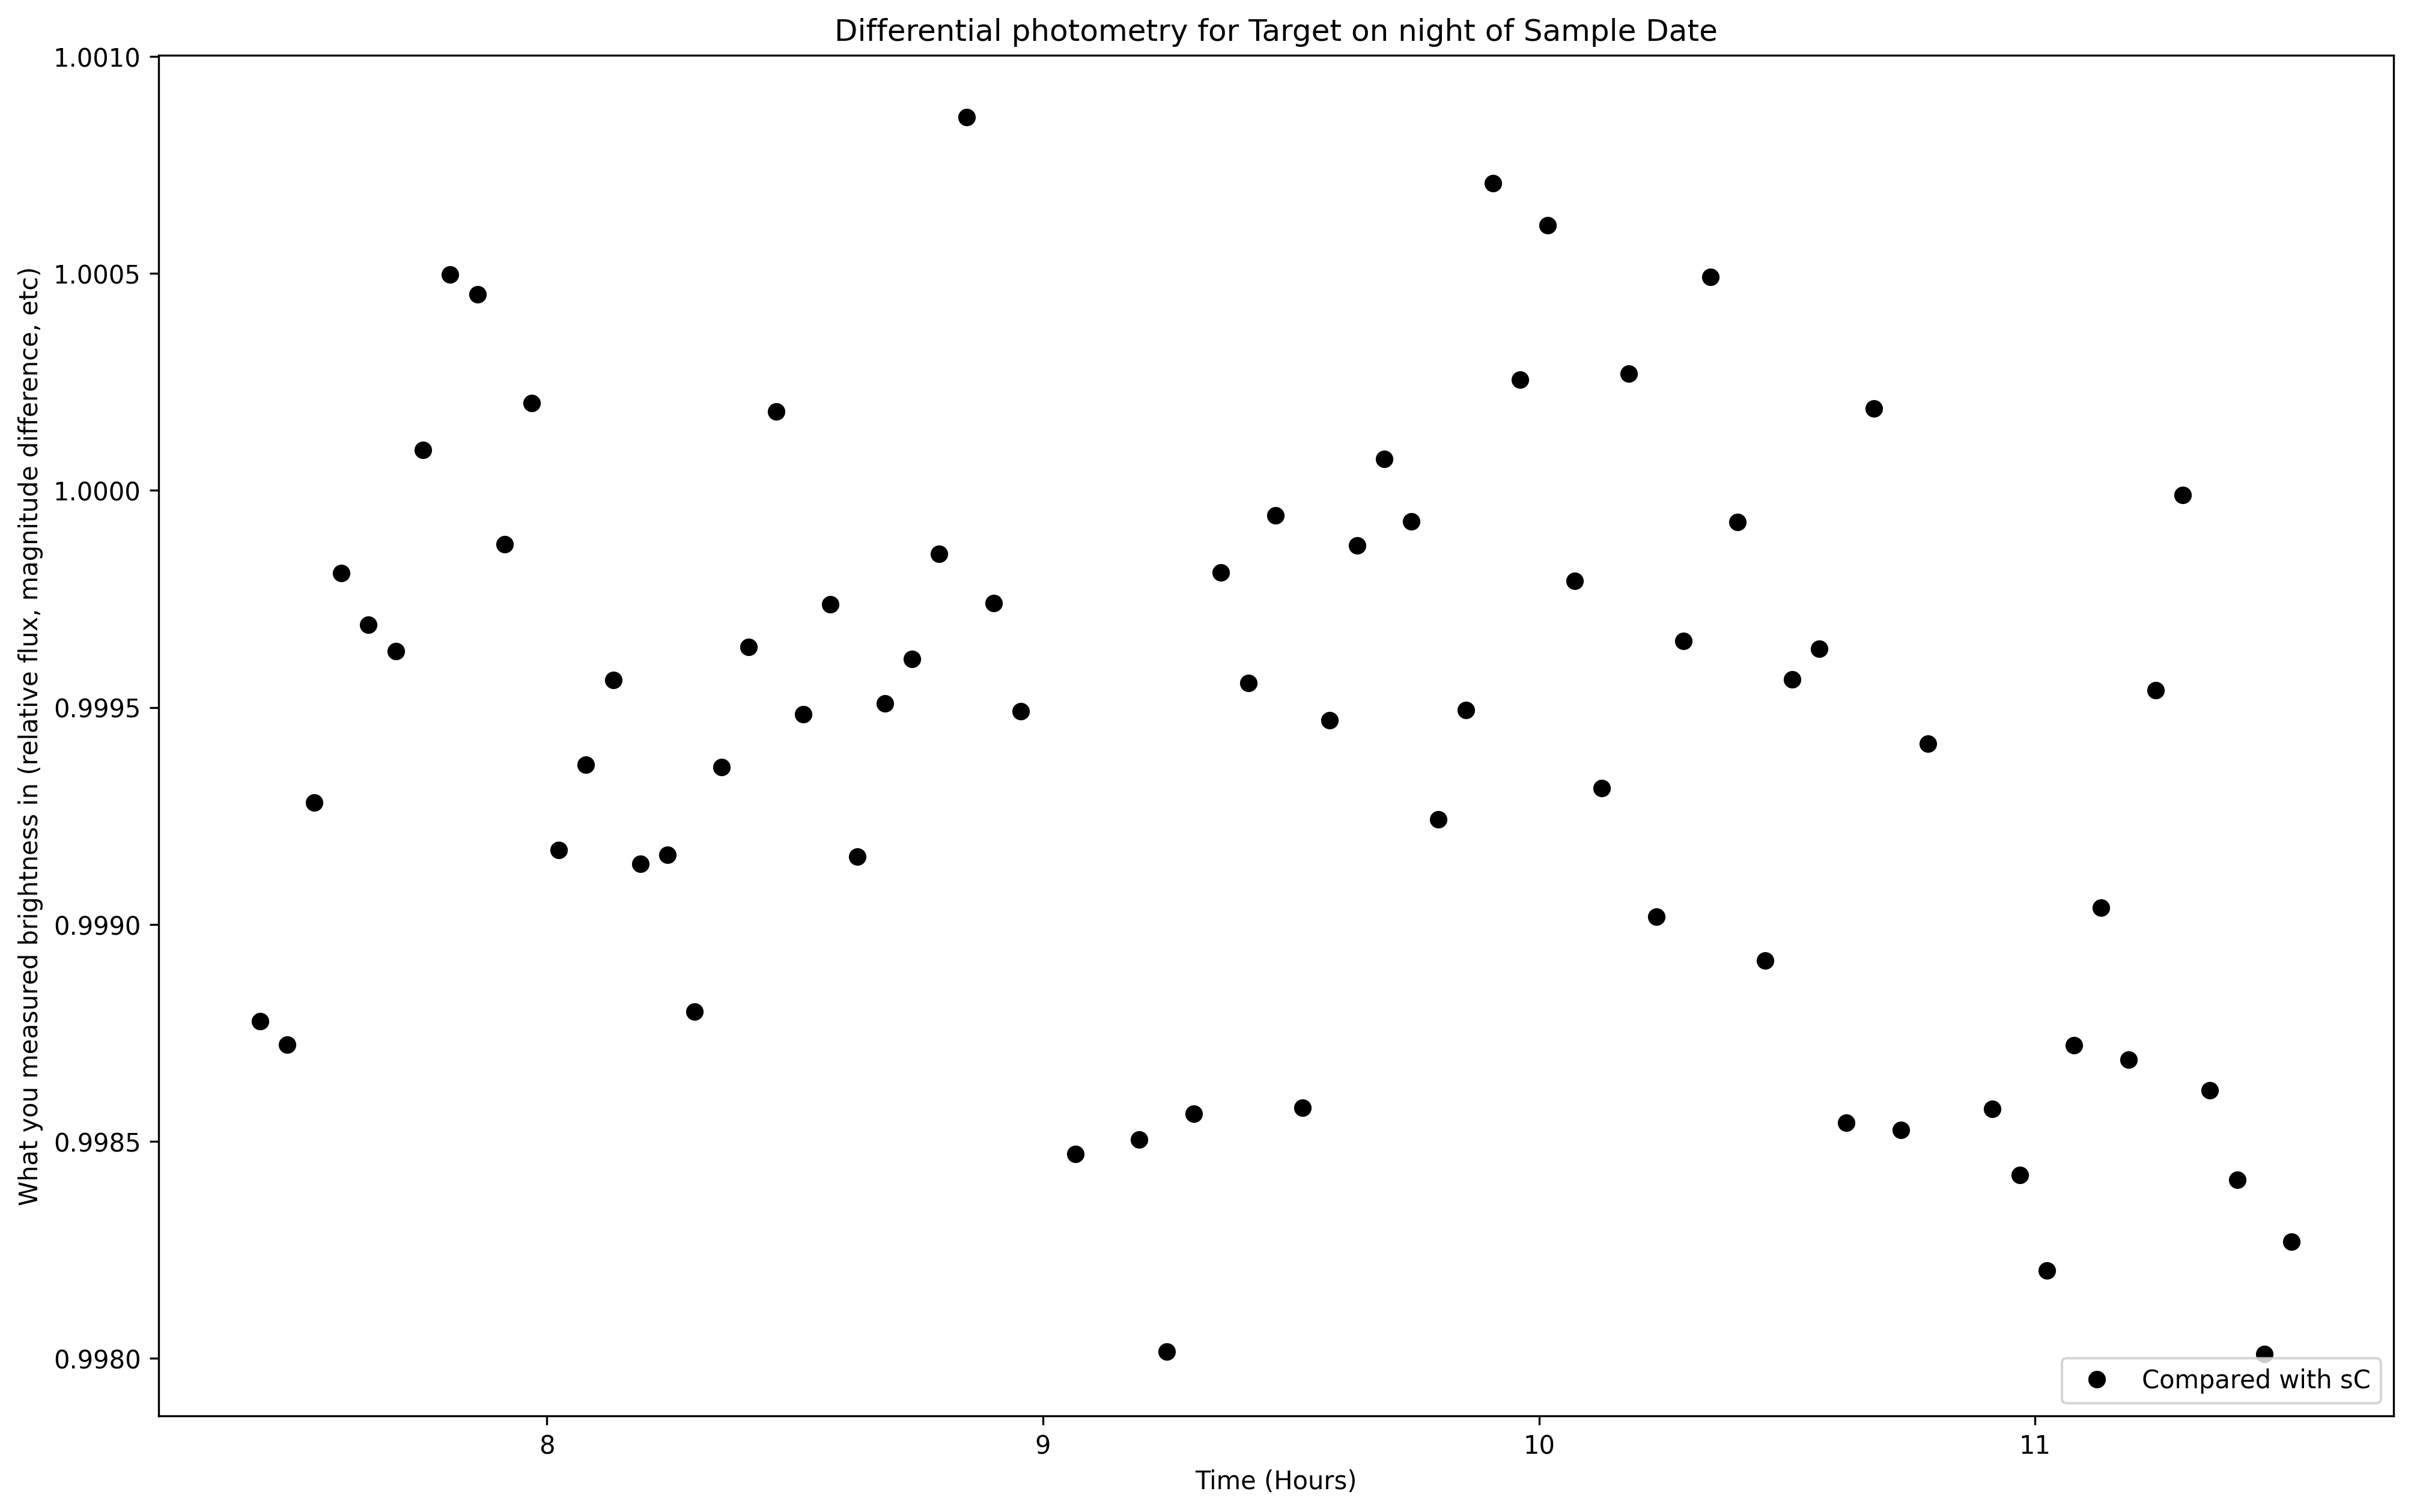

In [64]:
fig,ax = plt.subplots(1,1,figsize=(16,10),dpi=300)

reference_star_name = "sC"
target_star_name = "Target"
#ax.plot(times, differential_photometry_of_target_with_reference_star,'o',c='black',label=f"Compared with {reference_star_name}")
ax.plot(times, sample_table['target']/sample_table['sB'],'o',c='black',label=f"Compared with {reference_star_name}")

ax.set_xlabel("Time (Hours)")
ax.set_ylabel("What you measured brightness in (relative flux, magnitude difference, etc)")

date_of_observations = "Sample Date"
observation_date = date_of_observations
ax.set_title(f"Differential photometry for {target_star_name} on night of {date_of_observations}")

plt.legend(loc=4)
#plt.grid()
plt.show()
#plt.savefig("path_to_fig/figure_name.png_or_pdf",dpi=300)

-----
The project from now onwards is pretty open ended; in that it is largely up to you to decide what plots you want to make and any further steps you want to do with your data. The teaching team are around and availble to help provide suggestions if you would like, but the following cells provide a few examples of plots that I have commonly wanted to make during the test observations.

#### A plot showing the differential photometry for all of the sources

This can be helpful to make sure that the trend is withheld through all of the reference stars, and can also help you see if there are stars which should be removed from your data set, or choose a 'best' one to use for the prior plot.

This is most useful when normalized, so that the trends stack on top of each other.

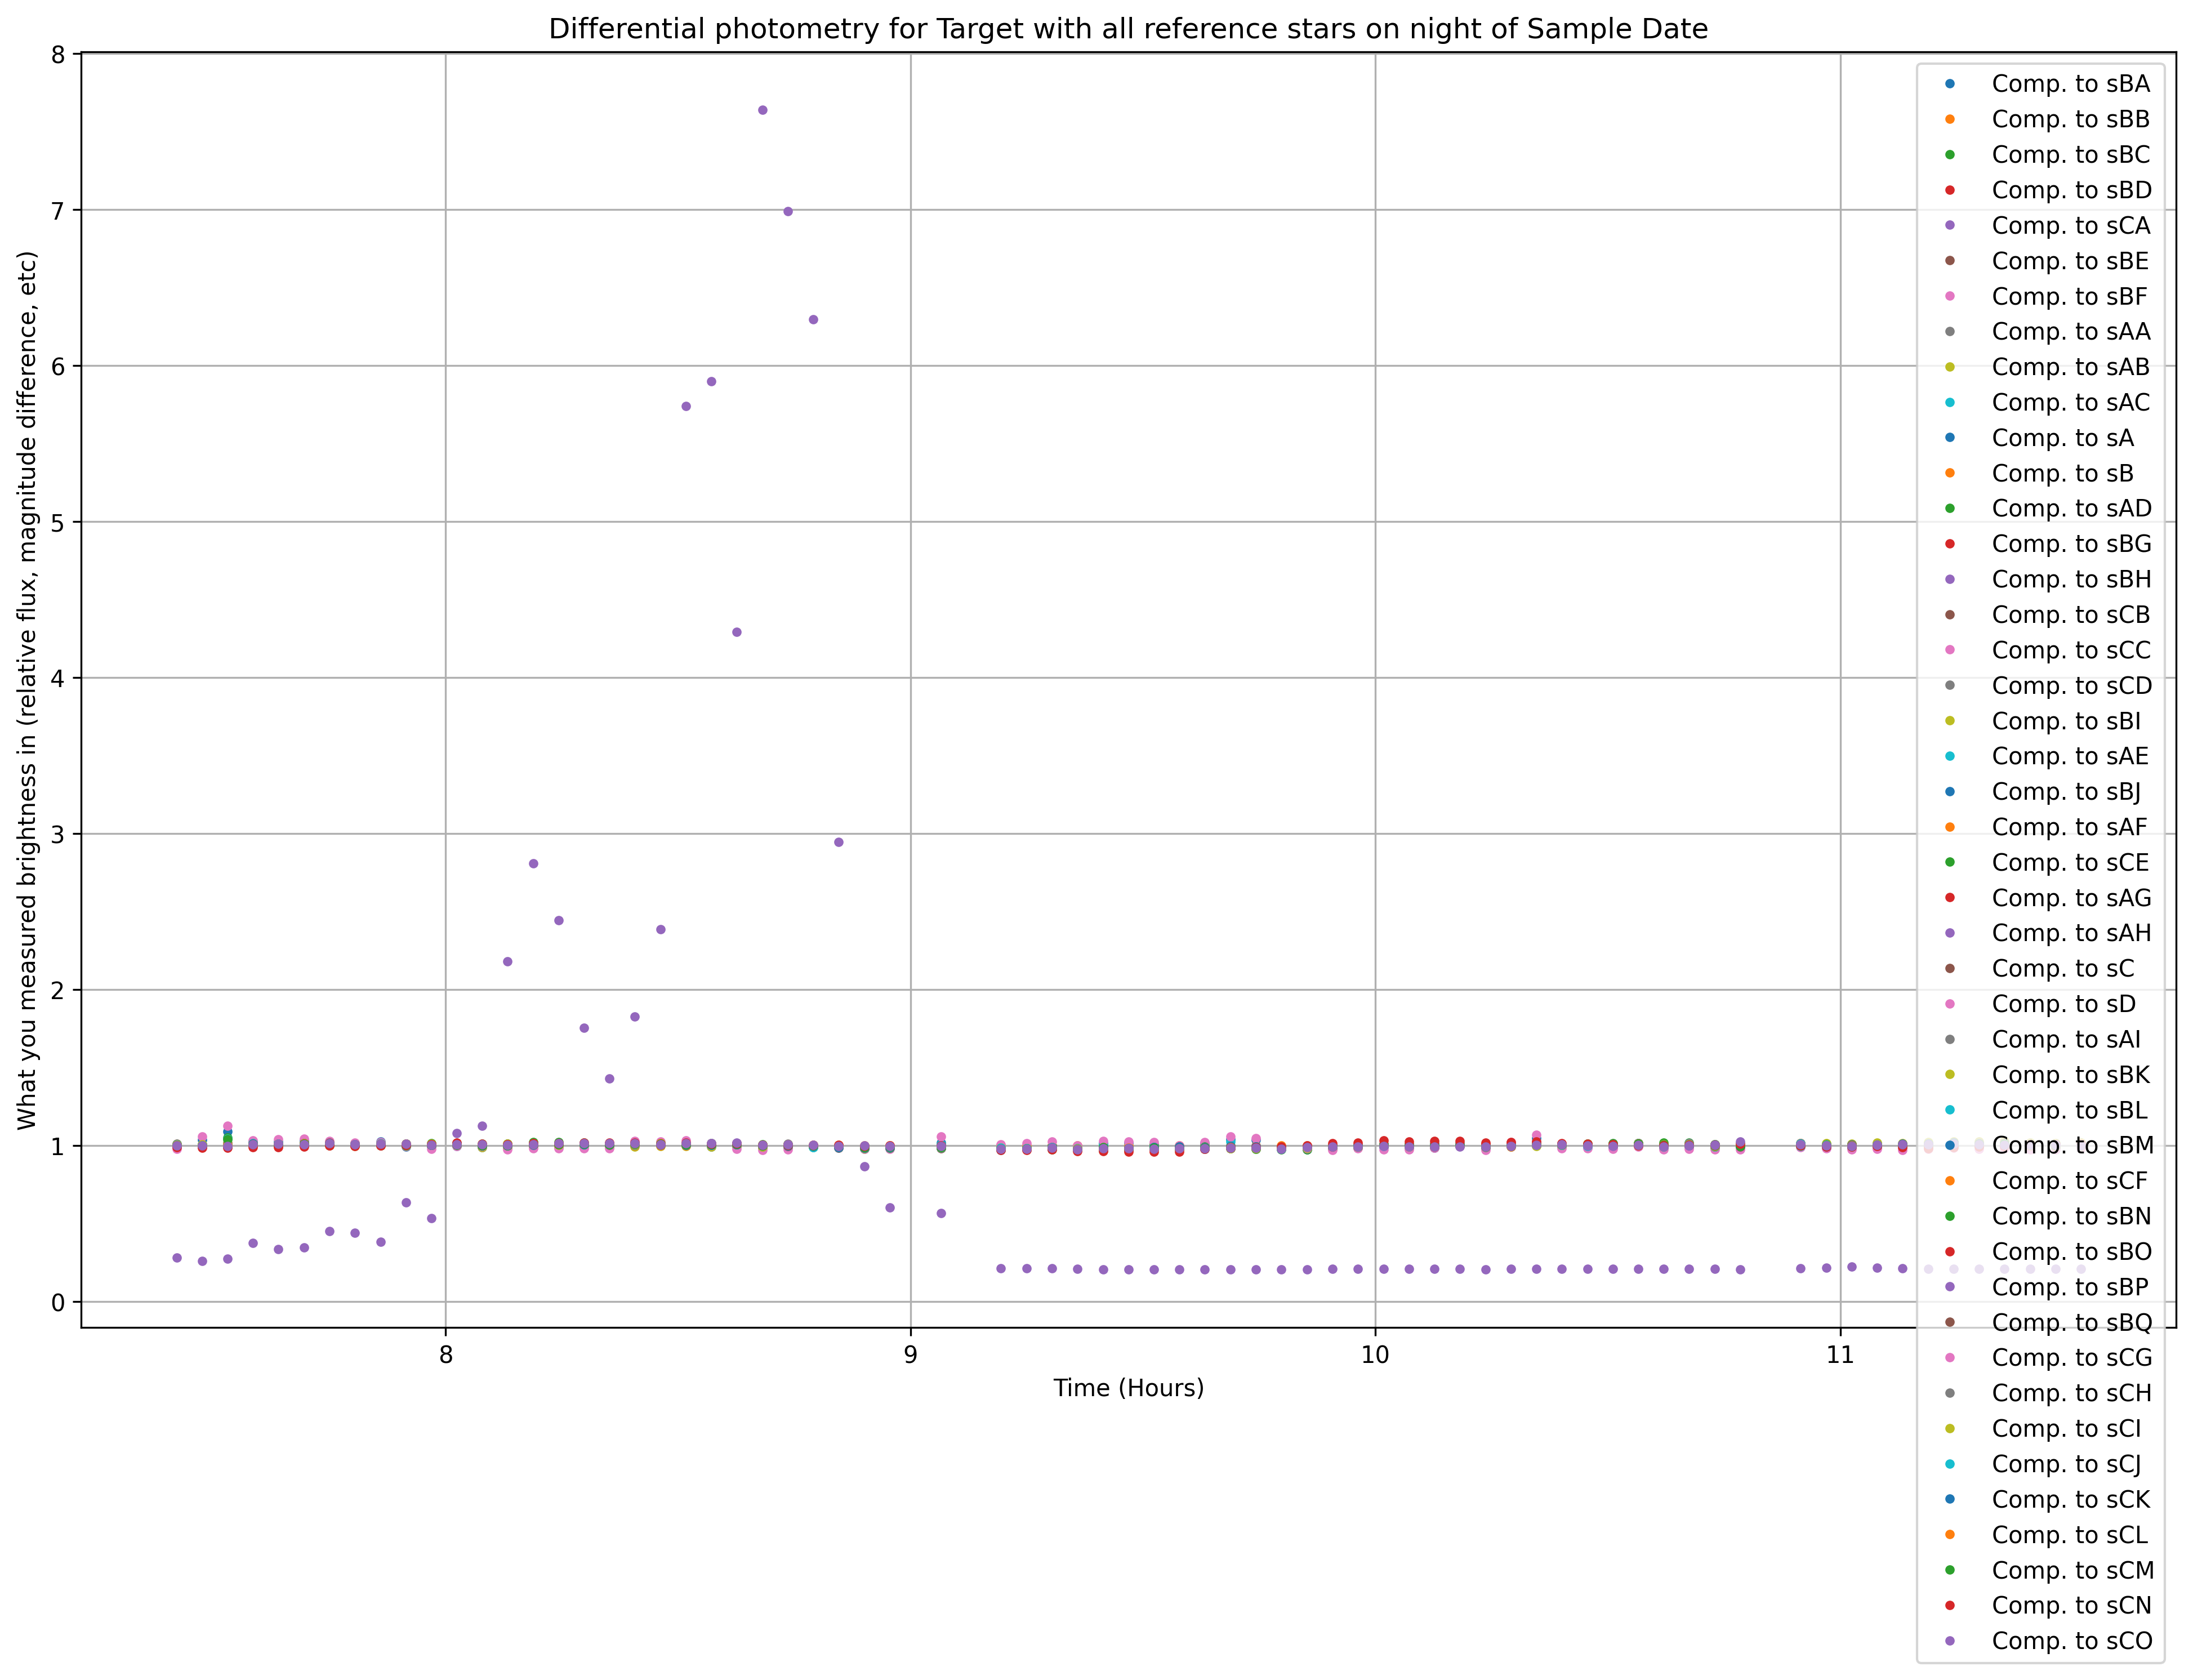

In [66]:
fig,ax = plt.subplots(1,1,figsize=(16,10),dpi=300)

differential_photometry_table=sample_table

for ref_star_name in sample_table.colnames[1:-1]: #skip first time column, and final target column
    #ref_star_name = differential_photometry_table[ref]
    ref_star_Normalized_Data = sample_table['target'].data / sample_table[ref_star_name].data
    ref_star_Normalized_Data = ref_star_Normalized_Data / np.mean(ref_star_Normalized_Data)
    
    ax.plot(times, ref_star_Normalized_Data,'.',label=f'Comp. to {ref_star_name}')
    #end for loop

ax.set_xlabel("Time (Hours)")
ax.set_ylabel("What you measured brightness in (relative flux, magnitude difference, etc)")
ax.set_title(f"Differential photometry for {target_star_name} with all reference stars on night of {date_of_observations}")

plt.legend()
plt.grid()
plt.show()

#### A plot showing the comparison of the reference stars to each other

I like to call these 'mega-plots' because you can plot a lot of info on them. What really matters is that, for stars that are constant in your field, they should be flat lines when compared with other constant stars. 

If any of these are not flat lines, they may be variable stars, and shouldn't be used as reference stars.

**Reminder: There is a very high chance that one of the 'random' stars that we gave an arbitrary name to WAS the target star. We added a set of coordinates for the target star's location at the end, but we never did any check to see if it was already there.**

I'll include two versions of this plot, one with all the stars comparing the one star on the same plot in different colors, and one with seperate plots along the row for each.

Due to the complexity of these plots, you will probably need to do some editing of the layout and sizing of things.

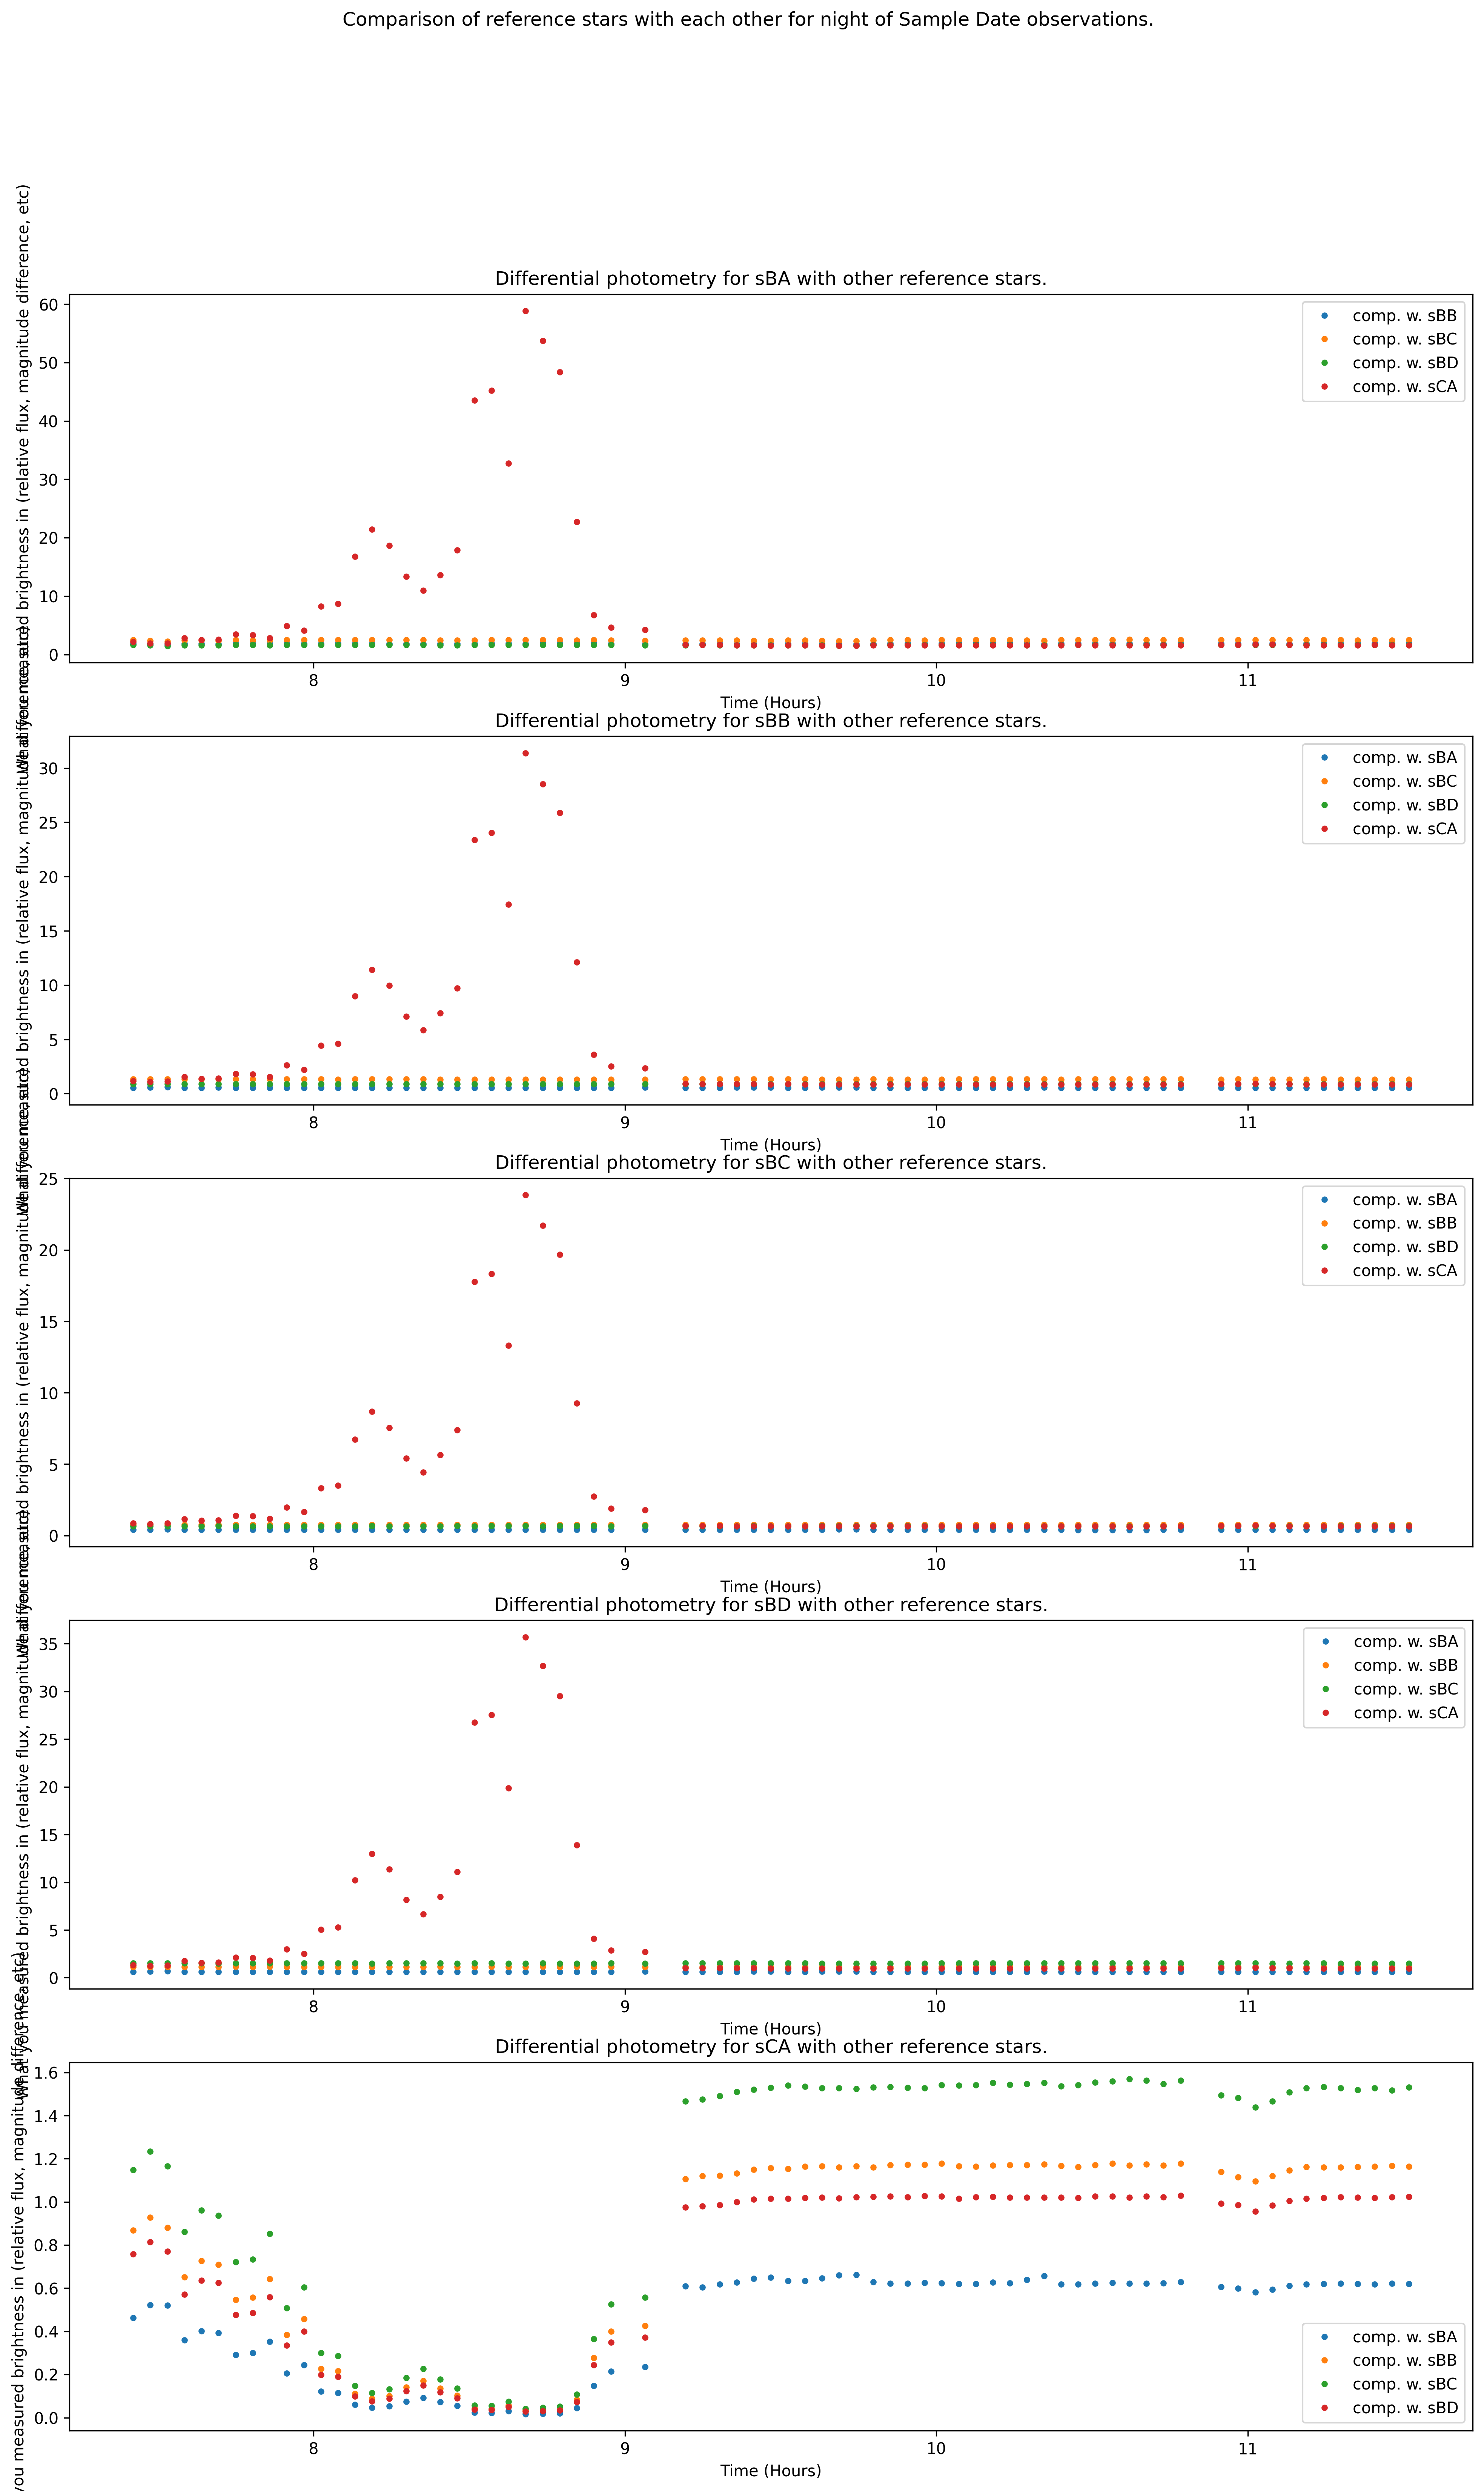

In [68]:
names_of_stars = differential_photometry_table.colnames[1:6]

#one column of plots
## !! You will almost certainly want to change the figsize so the plots are visible
fig,axs = plt.subplots(len(names_of_stars),1,figsize=(16,len(names_of_stars)*5),dpi=300) #add 'sharey=True' to lock y scale

for i, this_plot_star in enumerate(names_of_stars):
    for j, other_star in enumerate(names_of_stars):
        if i == j: continue
        # !! Use the non-differential photometry table for this part! Before we compared to 'target'!!
        axs[i].plot(times, sample_table[this_plot_star] / sample_table[other_star],'.',label=f"comp. w. {other_star}")

    axs[i].set_xlabel("Time (Hours)")
    axs[i].set_ylabel("What you measured brightness in (relative flux, magnitude difference, etc)")
    axs[i].set_title(f"Differential photometry for {this_plot_star} with other reference stars.")
    axs[i].legend()

plt.suptitle(f"Comparison of reference stars with each other for night of {observation_date} observations.")
plt.show()

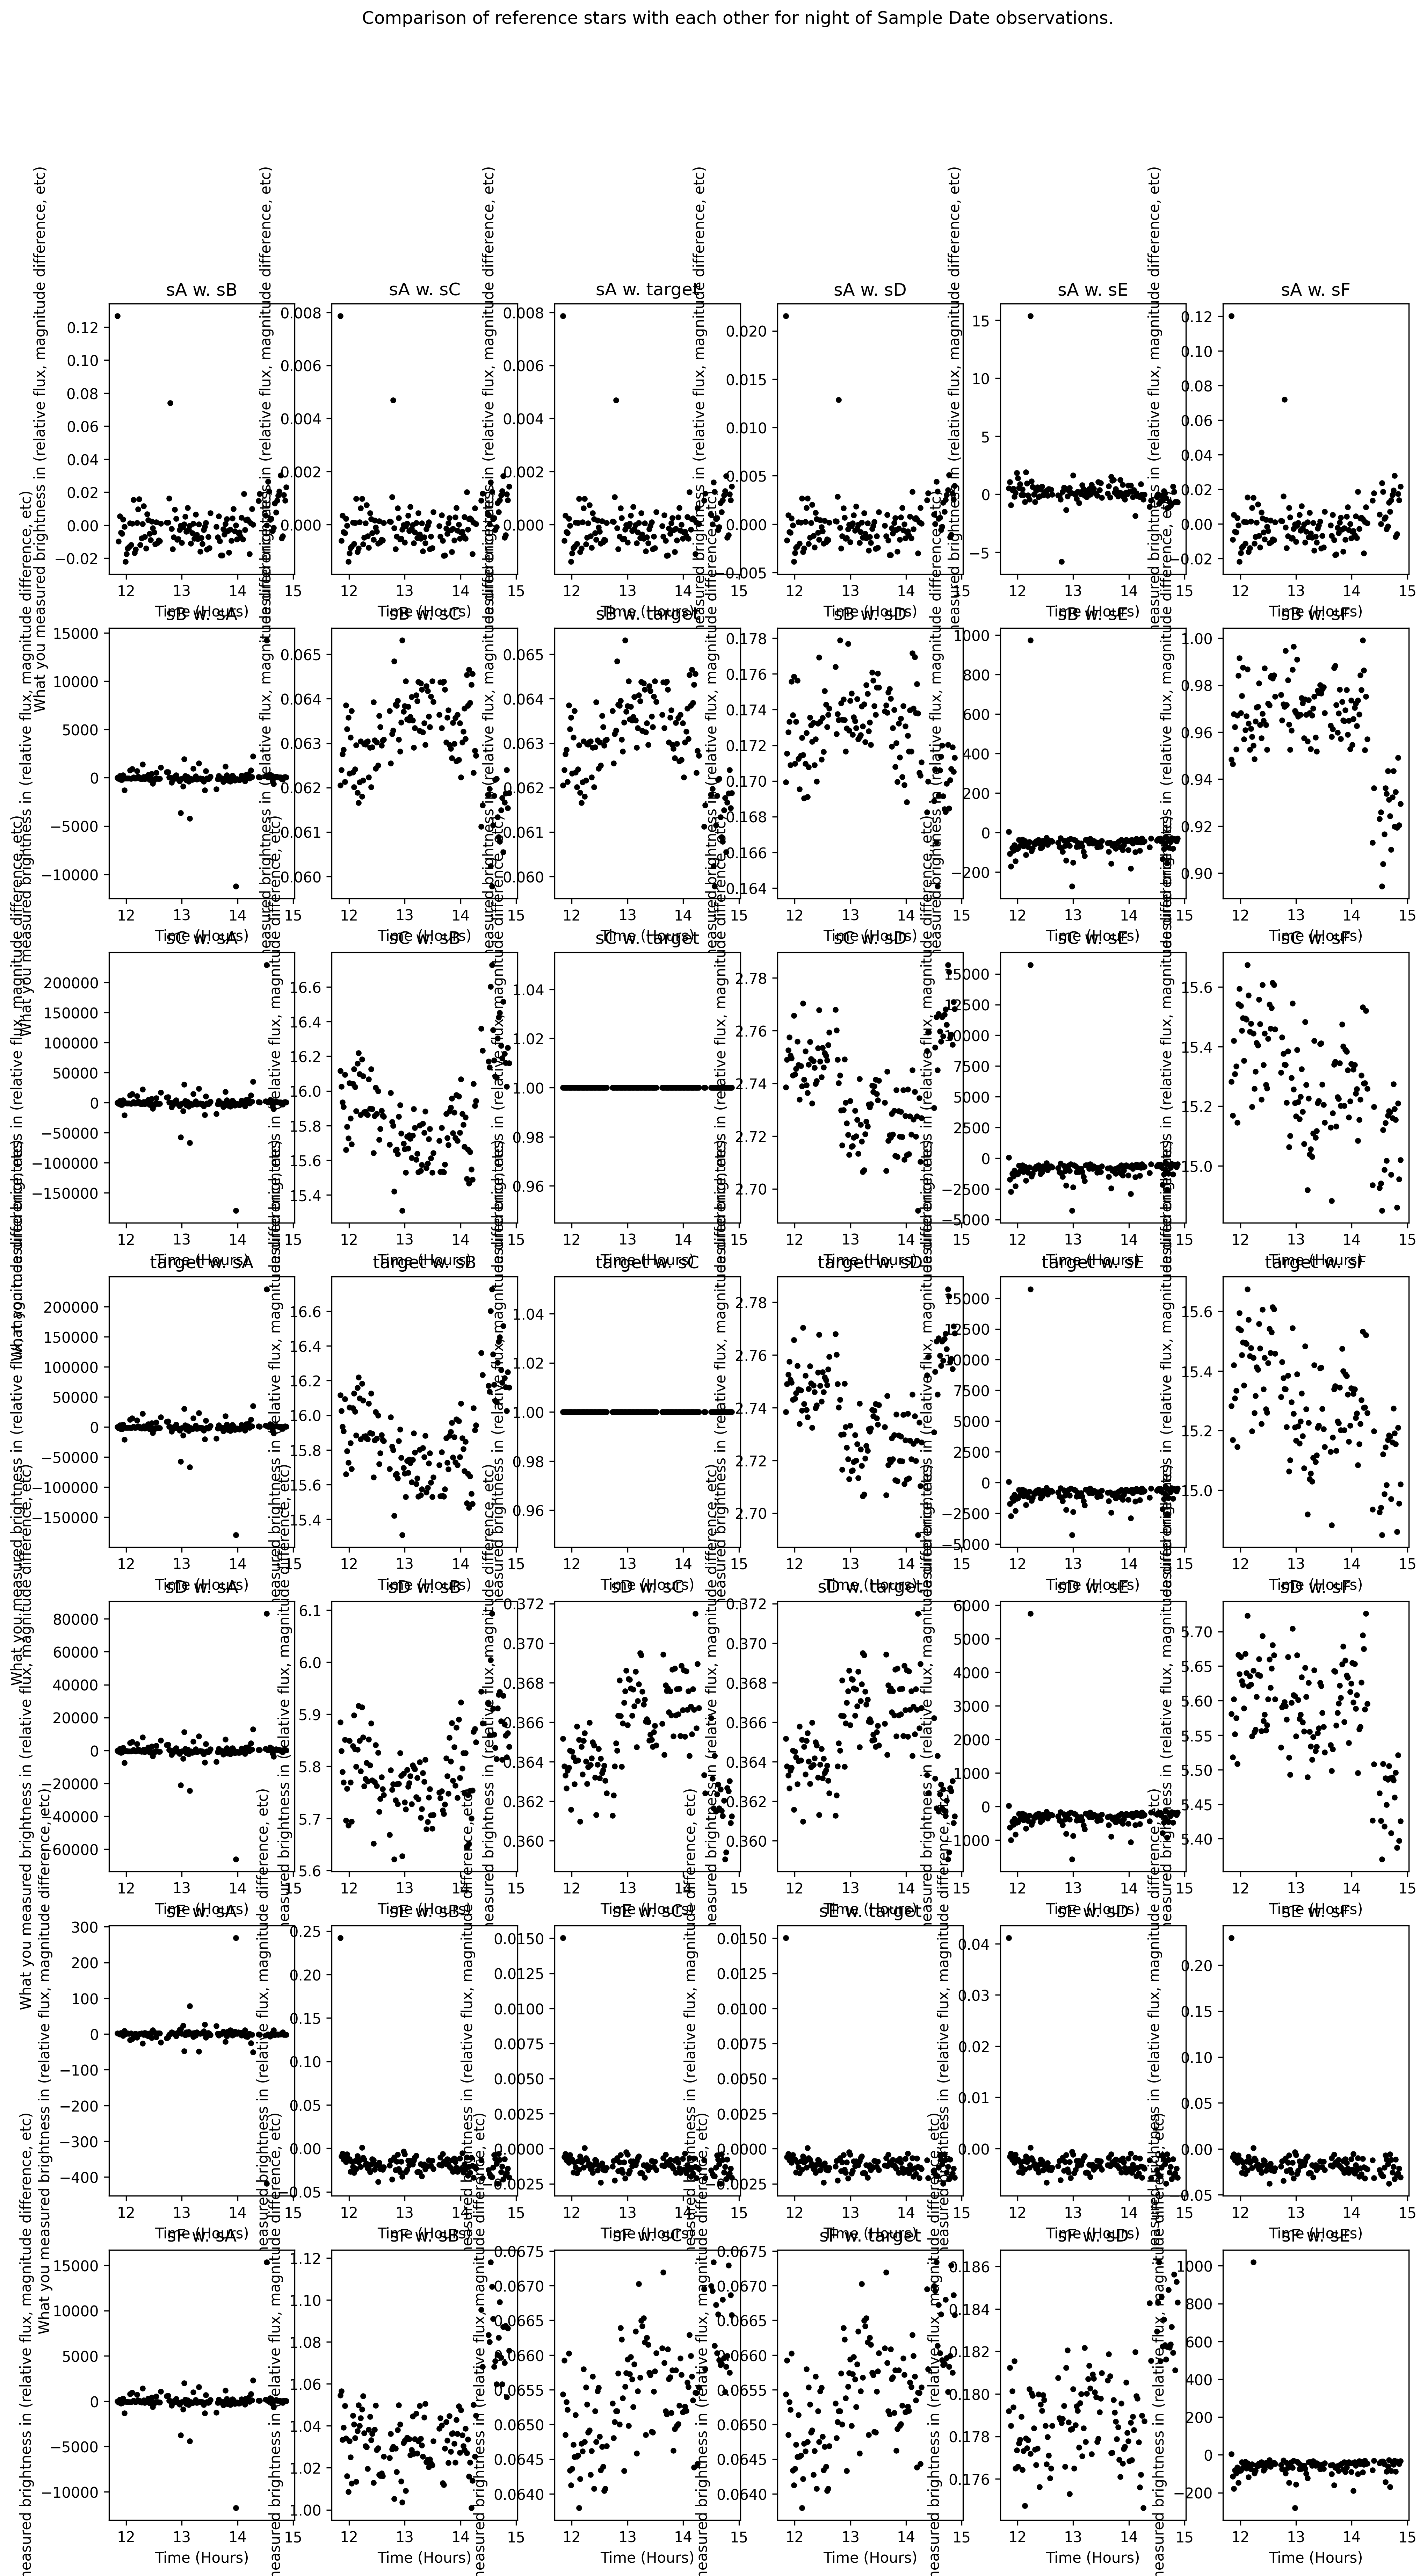

In [35]:
names_of_stars = ["s1",'s2','s3','s4','s5']
names_of_stars = differential_photometry_table.colnames[1:]

#one column of plots
## !! You will almost certainly want to change the figsize so the plots are visible
fig,axs = plt.subplots(len(names_of_stars),len(names_of_stars)-1,figsize=(16,len(names_of_stars)*4),dpi=300) #add 'sharey=True' to lock y scale

for i,this_plot_star in enumerate(names_of_stars):
    for j, other_star in enumerate(names_of_stars):
        if j < i:
            axs[i,j].plot(times, sample_table[this_plot_star] / sample_table[other_star],'.k')
            axs[i,j].set_title(f"{this_plot_star} w. {other_star}")
            axs[i,j].set_xlabel("Time (Hours)")
            axs[i,j].set_ylabel("What you measured brightness in (relative flux, magnitude difference, etc)")
        #skip i == j
        if j > i: #need to shift index one earlier after we pass i==j
            axs[i,j-1].plot(times, sample_table[this_plot_star] / sample_table[other_star],'.k')
            axs[i,j-1].set_title(f"{this_plot_star} w. {other_star}")
            axs[i,j-1].set_xlabel("Time (Hours)")
            axs[i,j-1].set_ylabel("What you measured brightness in (relative flux, magnitude difference, etc)")
# !! you may want to be more selective about what labels you add (ex, only the leftmost column gets a ylabel) !!

plt.suptitle(f"Comparison of reference stars with each other for night of {observation_date} observations.")
plt.show()

-----

I'm going to leave you with those as far as example plots. Hopefully you can go from there and make some fantastic plots of your data!

## Fitting Transit Models

One final thing to go over is a review of how to fit lines to data, and also explain something that should make the task considerably easier, and more realistic for you to do.

#### Transit Models (tangent)

I'd like to take a moment to go over three "tiers" of models for transit lines with you.

The first, and overly simple one, is a 'box' model. In this one, we begin with a constant flat line. At a certain point, we instantly drop down to some fraction of the base line. We then stay there for as long as the transit duration is, and then instantly return back up to the baseline.

The second, the 'trapezoid' model, is the best simple model to use. With it, we recognize that for some amount of the transit on either end, the planet is not fully blocking the star (a circle of constant brightness). We again have the constant baseline, and we go along until we hit the first point; "Point 1". At that point, our brightness begins decreasing at a constant rate, until, shortly after, it hits "Point 2". The planet is now fully blocking the star, and so the brightness stops decreasing, and remains at this minimum brightness until the next point. At "Point 3" the brightness begins to increase, at the same rate as between points 1 and 2, but going back up towards the baseline. "Point 4" is the point at which the planet has completely moved past the star, and the brightness is back at the constant, unobscured baseline.

See this diagram: https://iopscience.iop.org/article/10.1086/320580/fulltext/53085.fg4.html?doi=10.1086/320580

*Fun sidenote: This model is where the symbol for the transit duration comes from. It is not in fact a T with a subscript fourteen, but rather a T with a subscript one four; indicating the time it takes the planet to go from point 1 to point 4*


The third model, which is the one used by papers published by actual exoplanet researchers, takes into account that stars are actually spheres of very hot gas, and towards the edges there is less gas, and so the brightness is not constant over the surface of the star. This decrease in brightness as you go outwards is called "Limb Darkening", and causes transits to have the curved shape that you have probably seen. 

#### (End tangent)

All three of these models have already been defined as functions that can be given to scipy's optimize in order to fit parameters. They are defined in slightly different parameters than I described in my tangent, but this is so that the parameters are more useful right away.

Rather than defining the various points that things happen at in terms of the times they happen at, we instead will fit a `center` time/point, and a `duration`. The model functions additionally have a `base`line parameter, and a `delta` parameter, for the change in brightness (See the important use note at the end of this cell). The trapezoidal model also takes an additional `ingress/egress duration` that determines the time between points 1 and 2, and points 3 and 4.

*use note: due to an inconsitency I wasn't able to track down, delta for the limbDark model is actually defined opposite from that of the box and trapezoid. For the the simpler two, delta is the Fraction Of Base Brightness that it decreases to; ie, delta = 0.85 would mean it drops down 15 percent at the maximal point. In Limb Dark delta is instead the amount that drops down by, ie, 0.15 would drop the brightness 15%*

In [46]:
from scipy.optimize import curve_fit
import QAOP.exoModels as exoModels
inf = np.inf
#Params: Box (delta, l (duration), centre, base*)
#.       Trap(delta, l (duration), w (ingress), centre, base*)
#.       LD (delta, l(duration), centre, base*)

binTab = Table.read(codeFilePath+'QAOP/SampleData/sampleDataQatar1RelFluxBinned.ecsv')

time = binTab['time']
data = binTab['mean']
uncerr = binTab['std']
#The _org values were for plotting overtop with the unbinned data; when the binned data was a shorter time range
time_org = binTab['time']
data_org = binTab['mean']

In [49]:
# !! you should replace the guesses (p0) with approxtimate values for your data !!
guess_delta = 0.975
guess_duration = 1.74 
guess_gresstime = 0.4
guess_centretime = 9.3
guess_base = 0.1

#Do the fitting
# !! you should also set/unset the bounds; setting them to inf is unbounded !!
parb,covb = curve_fit(exoModels.boxDipArr,time,data,sigma=uncerr,p0=[guess_delta,guess_duration,guess_centretime,guess_base])
part,covt = curve_fit(exoModels.trapDipArr,time,data,sigma=uncerr,p0=[guess_delta,guess_duration,guess_gresstime,guess_centretime,guess_base],bounds=([-inf,0,-inf,8,-inf],[inf,inf,inf,11,inf]))
pard,covd = curve_fit(exoModels.limbDarkArr,time,data,sigma=uncerr,p0=[1-guess_delta,guess_duration,guess_centretime,guess_base],bounds=([0,0,-inf,-inf],[0.2,3,inf,inf]))

In [50]:
# we want to have time points at a higher frequency to make a high resolution plot of out fit
t_sample = np.linspace(time_org[0],time_org[-1],300)
db_sample = exoModels.boxDipArr(t_sample,parb[0],parb[1],parb[2],parb[3])
dt_sample = exoModels.trapDipArr(t_sample,part[0],part[1],part[2],part[3],part[4])
dd_sample = exoModels.limbDarkArr(t_sample,pard[0],pard[1],pard[2],pard[3]) 
#data + darkModel_sample

#Comparison to what our original data points had been; ie, plot fit for the same time points
db_comp = exoModels.boxDipArr(time_org,parb[0],parb[1],parb[2],parb[3])
dt_comp = exoModels.trapDipArr(time_org,part[0],part[1],part[2],part[3],part[4])
dd_comp = exoModels.limbDarkArr(time_org,pard[0],pard[1],pard[2],pard[3])

In [51]:
print("Trap. Params:")
print("depth {0[0]:.6}, l (transit time) {0[1]:.4}, w (ingress time) {0[2]:.3}, midpoint {0[3]:.4}, unobscured flux {0[4]:.6}".format(part))
print("Box. Params:")
print("depth {0[0]:.6}, l (transit time) {0[1]:.4}, midpoint {0[2]:.4}, unobscured flux {0[3]:.6}".format(parb))
print("LD Params:")
print("delta {0[0]:.6}, duration {0[1]:.6}, midpoint {0[2]:.4}, unobscured flux {0[3]:.6}".format(pard))

Trap. Params:
depth 0.975722, l (transit time) 1.019, w (ingress time) 0.67, midpoint 9.416, unobscured flux 0.990242
Box. Params:
depth 0.987897, l (transit time) 1.74, midpoint 9.3, unobscured flux 0.989875
LD Params:
delta 0.0181106, duration 1.17431, midpoint 9.672, unobscured flux 0.989869


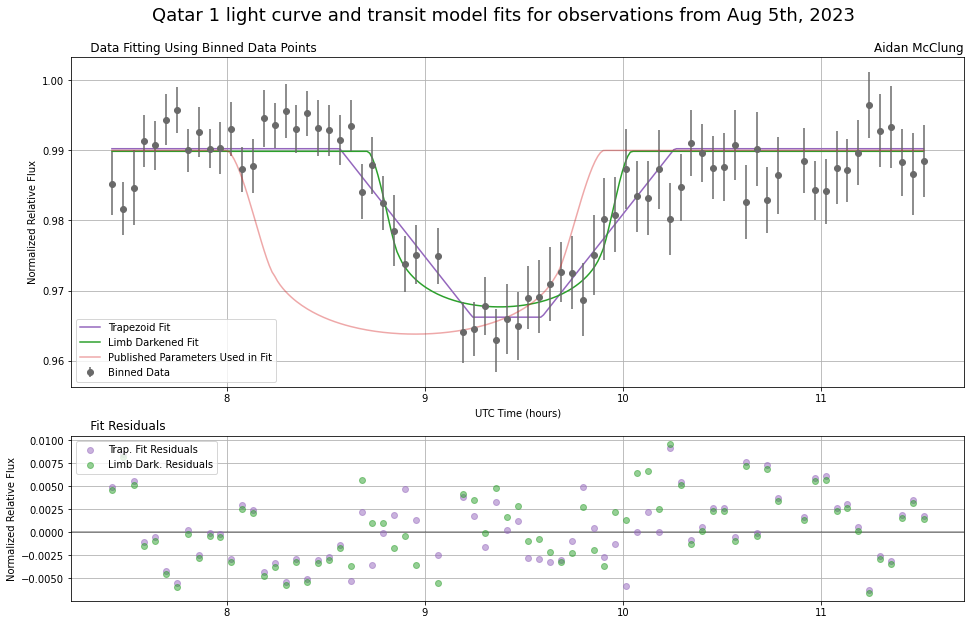

In [59]:
fig, axs = plt.subplots(2,1,figsize=(16,10),height_ratios=[4,2])
#print(time,data,uncerr)
prop_cycle = plt.rcParams['axes.prop_cycle']
def_colors = prop_cycle.by_key()['color']

pub_sample = exoModels.limbDarkArr(t_sample,0.14629**2,1.661,9.367,0.99)
axs[0].plot(t_sample,dt_sample,label="Trapezoid Fit",c=def_colors[4])
axs[0].plot(t_sample,dd_sample,label="Limb Darkened Fit",c=def_colors[2])
axs[0].errorbar(time,data,uncerr,fmt="o",c='dimgrey',label='Binned Data')
axs[0].plot(t_sample,pub_sample,label="Published Parameters Used in Fit",c=def_colors[3],alpha=0.4)
axs[0].legend(loc=3)
axs[0].grid()
axs[0].set_ylabel("Normalized Relative Flux")
axs[0].set_title("     Data Fitting Using Binned Data Points",loc='left')
axs[0].set_xlabel("UTC Time (hours)")


axs[1].axhline(0,alpha=0.4,color='k')
#axs[2].plot(time_org,db_comp-data_org,"o",alpha=0.5,label="Box Fit Residuals")
axs[1].plot(time_org,dt_comp-data_org,"o",alpha=0.5,label="Trap. Fit Residuals",c=def_colors[4])
axs[1].plot(time_org,dd_comp-data_org,"o",alpha=0.5,label="Limb Dark. Residuals",c=def_colors[2])
axs[1].legend(loc=2)
axs[1].grid()
axs[1].set_ylabel("Normalized Relative Flux")
axs[1].set_title("     Fit Residuals",loc='left')

axs[0].set_title("Aidan McClung",loc='right')
plt.suptitle("Qatar 1 light curve and transit model fits for observations from Aug 5th, 2023",fontsize=18,y=0.95)
plt.show()

#### Bonus Tangent on limb darkening parameterization (extremely optional)

Limb Darkening is actually a very complicated and hard to implement thing. It took me a span of several weeks and a lot of paper reading in order to be able to implement it as well as it is here, which is admittedly not the most accurate in the world. The specifics of the curve are determined by 4 parameters, which are constants for each star, but can vary pretty significantly. If you would like to be as accurate as possible, you can look up the parameters that most closely match your star from a <a href="https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/A%2bA/363/1081/atlasco">published database</a>, and replace the values in the `limbDark.py` module. If anyone would like help doing this (admittedly unnecessary) modification, you can contact me (the author) at 20ajm7(at)queensu.ca.